# Task 1 - Derivation of equations of motion

The Hamiltonian for our non-linear springs is:

$$ H = \sum_{i=1}^N \frac{p_i^2}{2m} + \sum_{i=0}^N \left[\frac{\kappa}{2}(u_{i+1}-u_i)^2 + \frac{\alpha}{3}(u_{i+1}-u_i)^3 \right].$$

The corresponding Heisenberg equations of motion are:

$$ \dot{u_i} = \frac{\partial H}{\partial p_i} = \frac{p_i}{m}$$
$$ \dot{p_i} = -\frac{\partial H}{\partial u_i} = \kappa (u_{i+1}-u_i) + \alpha (u_{i+1}-u_i)$$

which gives us Newtons second law:

$$ \ddot{u_i} = a_i = \frac{1}{m} \left[\kappa (u_{i+1}-u_i) + \alpha (u_{i+1}-u_i)\right], \hspace{20px} i=0,1,...,N+1 $$

Setting $m=\kappa=1$ sets our dimensionless units in that our unit of mass and force has been decied. In these units, our equations of motion simplify to:

$$ a_i = \left[(u_{i+1}-u_i) + \alpha (u_{i+1}-u_i) \right], \hspace{20px} i=0,1,...,N+1 $$

where then $\alpha$ is a dimensionless parameter.

# Task 2

Our boundary conditions are fixed, were the endpoints are always zero. Thus we don't declare the endpoints in our displacement vector, since we know them to always be 0. 

We have all energy in one mode (k=1), $P_k = \sqrt{2E_0} \delta_{1k}$ and no displacement $Q_k = 0 \hspace{10px}\forall k$. We consider the case where N = 32 and assume $E_0 = N$. 

The inverse transformations from the generalized normal modes are:

$$ u_i = \sqrt{\frac{2}{N+1}} \sum_{k=1}^N \frac{Q_k}{\sqrt{m}} \sin{\frac{ik\pi}{N+1}}, \hspace{20px} i=1,...,N $$
$$ p_i = \sqrt{\frac{2}{N+1}} \sum_{k=1}^N \sqrt{m}P_k \sin{\frac{ik\pi}{N+1}}, \hspace{20px} i=1,...,N $$

With our initial conditions, $u_i = 0 \hspace{10px}\forall i$ and $p_i = \sqrt{\frac{2}{N+1}} \sqrt{m} \sqrt{2E_0} \sin{\frac{i\pi}{N+1}}$ where $E_0 = N$ and $m=1$. We thus get the ICs:
$$ u_i(0) = 0, \hspace{20px} i=1,...,N $$
$$ p_i(0) = \sqrt{\frac{4N}{N+1}} \sin{\frac{i\pi}{N+1}}, \hspace{20px} i=1,...,N  $$

Since $m=1$, $p_i=v_i$ in our units.

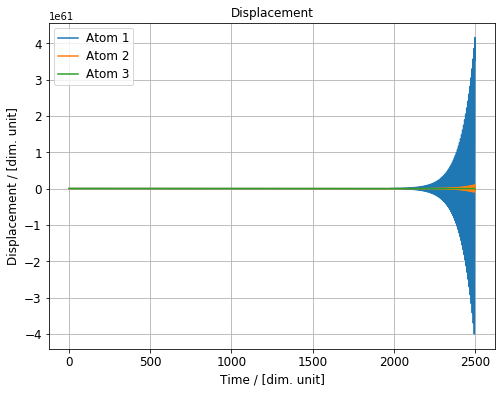

In [39]:
# plot the velocities

# imports
import matplotlib.pylab as plt
import numpy as np

# input file
filepath = ""
filename = 'disp.dat'

# import data
data = np.loadtxt(filepath+filename)

# size of figure
plt.figure(figsize=(8,6))

# plot
plt.plot(data[:,0], data[:,1],'-',label='Atom 1')
plt.plot(data[:,0], data[:,2],'-',label='Atom 2')
plt.plot(data[:,0], data[:,3],'-',label='Atom 3')

# labels
plt.xlabel('Time / [dim. unit]', fontsize=12)
plt.ylabel('Displacement / [dim. unit]', fontsize=12)

# legend
plt.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=12) 

# axis limits
# plt.xlim([0,50])
plt.grid()

# tick fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Displacement")

# save and display the plot
plt.savefig(f'{filepath}displacement.pdf')
plt.show()

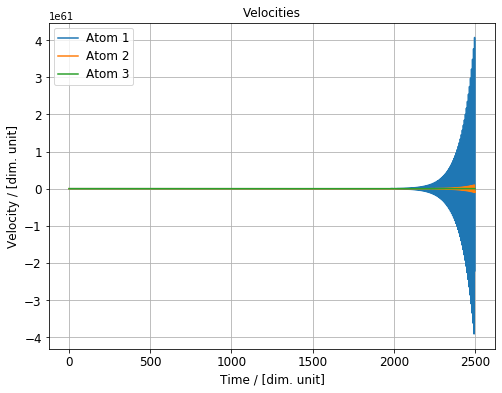

In [40]:
# plot the velocities

# imports
import matplotlib.pylab as plt
import numpy as np

# input file
filepath = ""
filename = 'velo.dat'

# import data
data = np.loadtxt(filepath+filename)

# size of figure
plt.figure(figsize=(8,6))

# plot
plt.plot(data[:,0], data[:,1],'-',label='Atom 1')
plt.plot(data[:,0], data[:,2],'-',label='Atom 2')
plt.plot(data[:,0], data[:,3],'-',label='Atom 3')

# labels
plt.xlabel('Time / [dim. unit]', fontsize=12)
plt.ylabel('Velocity / [dim. unit]', fontsize=12)

# legend
plt.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=12) 

# axis limits
# plt.xlim([0,50])
plt.grid()

# tick fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Velocities")

# save and display the plot
plt.savefig(f'{filepath}velocities.pdf')
plt.show()

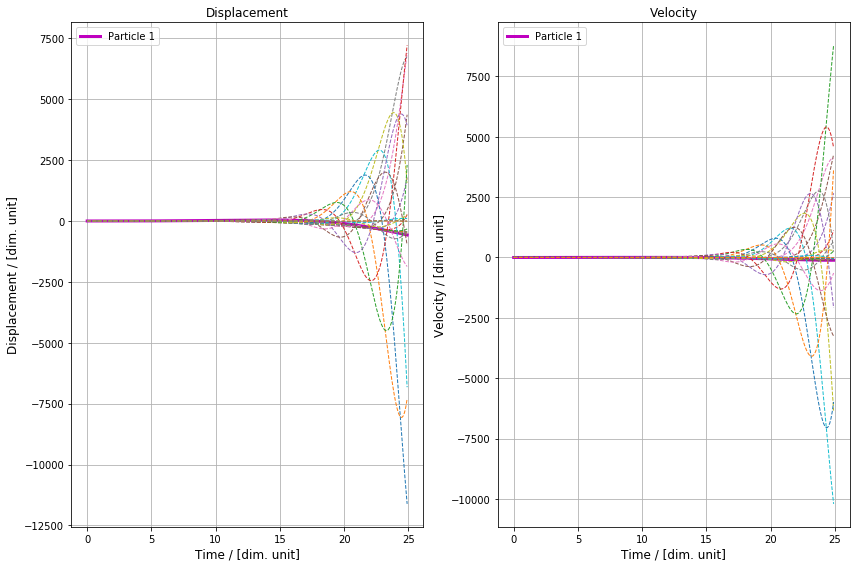

In [56]:
# Plot displacements and velocities for 3 particles with alpha=0, to make sure it looks similar to task 4 on E1. 
# imports
import matplotlib.pyplot as plt
import numpy as np

# input file
filepath = ""
filename = 'disp.dat'

# import data
disp_data = np.loadtxt(filepath+filename)

filename = 'velo.dat'
velo_data = np.loadtxt(filepath+filename)

data = [disp_data, velo_data]

# size of figure
fig, axs = plt.subplots(1,2, figsize=(12,8))

nbr_particles = 32
titles = ['Displacement', 'Velocity']
for k,title in enumerate(titles):
    
    for i in range(1,nbr_particles):
        l=''
        alpha=0.3
        color=f'C{i}'
        lw=1
        ln='--'
        if i==1:
            l = 'Particle 1'
            color='m'
            alpha=1
            lw=3
            ln='-'
        axs[k].plot(data[k][:,0], data[k][:,i],linewidth=lw, linestyle=ln, c=color, label=l)
    axs[k].set_xlabel('Time / [dim. unit]', fontsize=12)
    axs[k].set_ylabel(f'{title} / [dim. unit]', fontsize=12)
    axs[k].set_title(f'{title}')
    axs[k].legend(loc='best')
    axs[k].grid()
    
plt.tight_layout()
plt.savefig(f'{filepath}disp_velo.pdf')


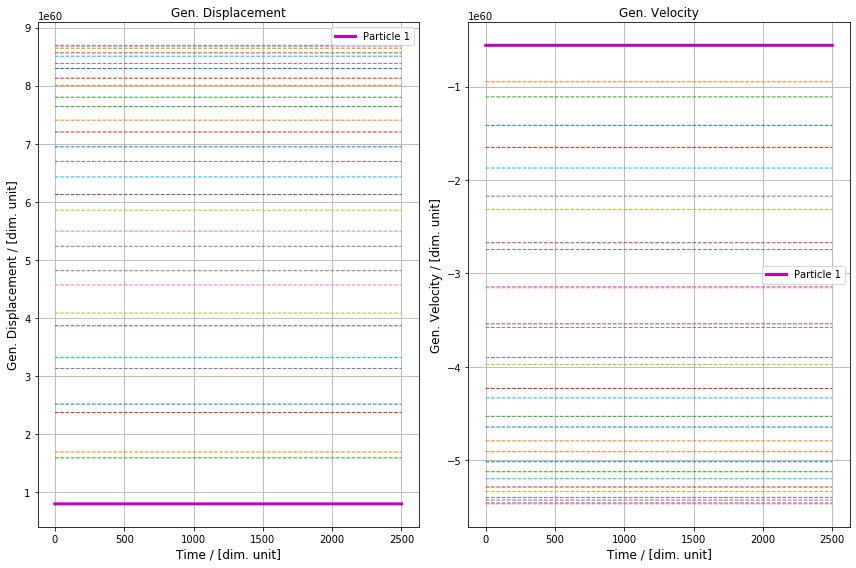

In [65]:
# Plot displacements and velocities for 3 particles with alpha=0, to make sure it looks similar to task 4 on E1. 
# imports
import matplotlib.pyplot as plt
import numpy as np

# input file
filepath = ""
filename = 'gen_disp.dat'

# import data
disp_data = np.loadtxt(filepath+filename)

filename = 'gen_velo.dat'
velo_data = np.loadtxt(filepath+filename)

data = [disp_data, velo_data]

# size of figure
fig, axs = plt.subplots(1,2, figsize=(12,8))

nbr_particles = 32
titles = ['Gen. Displacement', 'Gen. Velocity']
for k,title in enumerate(titles):
    
    for i in range(1,nbr_particles):
        l=''
        alpha=0.3
        color=f'C{i}'
        lw=1
        ln='--'
        if i==1:
            l = 'Particle 1'
            color='m'
            alpha=1
            lw=3
            ln='-'
        axs[k].plot(data[k][:,0], data[k][:,i],linewidth=lw, linestyle=ln, c=color, label=l)
    axs[k].set_xlabel('Time / [dim. unit]', fontsize=12)
    axs[k].set_ylabel(f'{title} / [dim. unit]', fontsize=12)
    axs[k].set_title(f'{title}')
    axs[k].legend(loc='best')
    axs[k].grid()
    
plt.tight_layout()
plt.savefig(f'{filepath}gen_disp_velo.pdf')


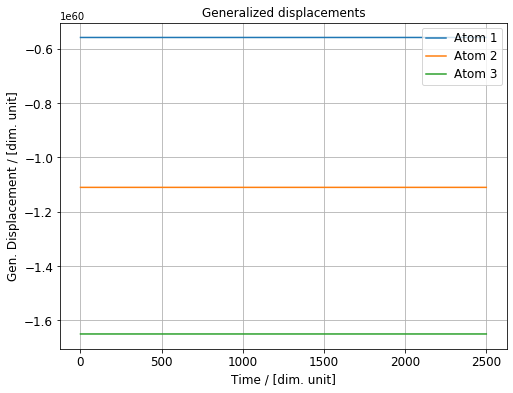

In [27]:
# Plot the normal modes
import matplotlib.pylab as plt
import numpy as np

# input file
filepath = ""
filename = 'gen_velo.dat'

# import data
data = np.loadtxt(filepath+filename)

# size of figure
plt.figure(2, figsize=(8,6))

# plot
plt.plot(data[:,0], data[:,1],'-',label='Atom 1')
plt.plot(data[:,0], data[:,2],'-',label='Atom 2')
plt.plot(data[:,0], data[:,3],'-',label='Atom 3')

# labels
plt.xlabel('Time / [dim. unit]', fontsize=12)
plt.ylabel('Gen. Displacement / [dim. unit]', fontsize=12)

# legend
plt.legend()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=12) 

# axis limits
# plt.xlim([0,50])
plt.grid()

# tick fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Generalized displacements")

# save and display the plot
plt.savefig(f'{filepath}generalized_displacements.pdf')
plt.show()

In [ ]:
Here we see that 